In [87]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
from tensorflow_probability import math as tfm
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# Define the kernel (covariance function)
amplitude = tfp.util.TransformedVariable(
            1.0, tfp.bijectors.Softplus(), dtype=np.float64, name='amplitude')
length_scale = tfp.util.TransformedVariable(
            1.0, tfp.bijectors.Softplus(), dtype=np.float64, name='length_scale')
kernel = tfm.psd_kernels.ExponentiatedQuadratic(amplitude=amplitude, length_scale=length_scale)

# Define the index points (input data)
index_points = np.expand_dims(np.linspace(-5., 5., 100), axis=-1)

# Define the mean function
mean_fn = lambda x: tf.zeros_like(x[..., 0])

# Define the Student's t-process
df = 3.0  # degrees of freedom
tp = tfp.distributions.StudentTProcess(
    df=df,
    kernel=kernel,
    index_points=index_points,
    mean_fn=mean_fn,
    always_yield_multivariate_student_t=True,
)

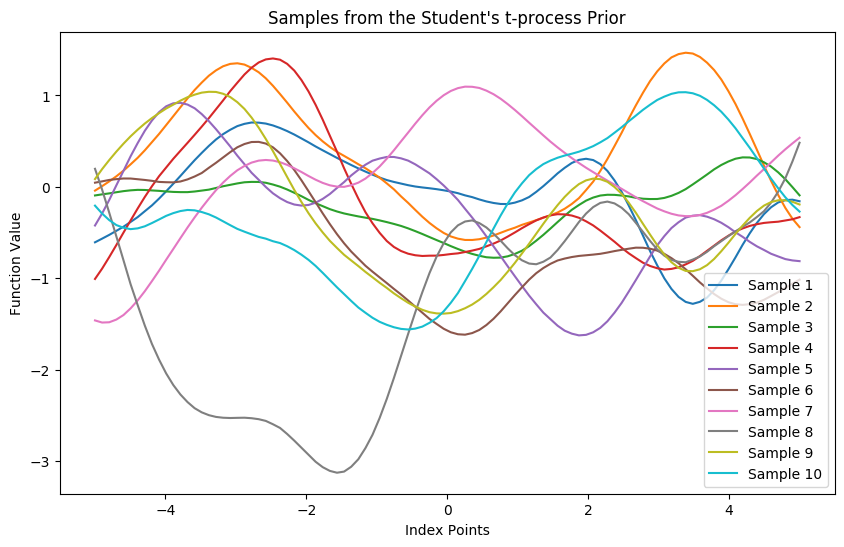

In [89]:
# Sample from the prior
num_samples = 10
samples = tp.sample(num_samples)

# Plot the samples
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(index_points, samples[i], label=f'Sample {i+1}')
plt.title('Samples from the Student\'s t-process Prior')
plt.xlabel('Index Points')
plt.ylabel('Function Value')
plt.legend()
plt.show()

In [90]:
samples.shape

TensorShape([10, 100])

In [91]:
index_points.shape

(100, 1)

In [109]:
# Define some observed data (noisy observations from a sinusoidal function)
observed_index_points = np.array([-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 1.0]).reshape(-1, 1)
observed_values = np.sin(observed_index_points) + np.random.normal(0, 0.1, observed_index_points.shape)

# Define the observation noise variance
observation_noise_variance = 0.1

In [110]:
print(observed_index_points.shape)
print(observed_values.shape)

(10, 1)
(10, 1)


In [111]:
print(tp.covariance().shape)
print(tp.mean().shape)
print(tp.stddev().shape)

(100, 100)
(100,)
(100,)


In [113]:
tp_posterior = tp.posterior_predictive(observations=observed_values, predictive_index_points=index_points, observation_index_points=observed_index_points, observation_noise_variance=observation_noise_variance)
posterior_samples = tp_posterior.sample(10)

ValueError: Dimensions 10 and 1 are not compatible

In [114]:
# Define some observed data (noisy observations from a sinusoidal function)
observed_index_points = np.array([-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]).reshape(-1, 1)

observed_values = np.sin(observed_index_points) + np.random.normal(0, 0.1, observed_index_points.shape)

# Define the observation noise variance
observation_noise_variance = 0.1

# Condition the process on the observed data
tp_posterior = tp.posterior_predictive(predictive_index_points=observed_index_points, observations=observed_values, observation_noise_variance=observation_noise_variance)

# Sample from the posterior
posterior_samples = tp_posterior.sample(10)

# Plot the posterior samples
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(index_points, posterior_samples[i], label=f'Posterior Sample {i+1}', alpha=0.6)
plt.scatter(observed_index_points, observed_values, c='red', label='Observed Data')
plt.title('Samples from the Student\'s t-process Posterior')
plt.xlabel('Index Points')
plt.ylabel('Function Value')
plt.legend()
plt.show()



ValueError: Dimensions 100 and 1 are not compatible